In [2]:
# pip install matplotlib

Reading the Image

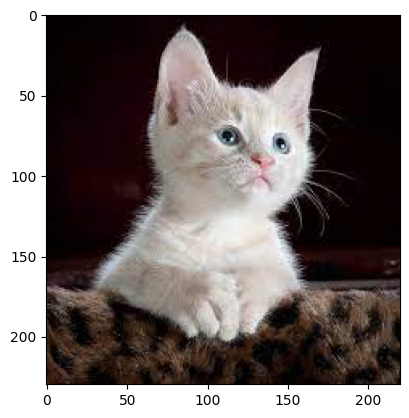

In [5]:
from PIL import Image
input_img=Image.open("/content/drive/MyDrive/Data Analysis/cat.jpg")
import matplotlib.pyplot as plt
plt.imshow(input_img)

Transform Related to RestNet and AlexNet

In [6]:
from torchvision import transforms
transform= transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.48,0.456,0.406],std=[0.229,0.224,0.225])
])

Apply TransfromImage to input Image

In [8]:
transform_inputImg=transform(input_img)

Analyze the shape of the image

In [10]:
print(transform_inputImg.shape)

torch.Size([3, 224, 224])


Applying Data into Batch Format

In [11]:
import torch
imputImg_batch=torch.unsqueeze(transform_inputImg,0)

In [12]:
print(imputImg_batch.shape)

torch.Size([1, 3, 224, 224])


ResNet Model

In [13]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

Loading the ResNet 101 Model

In [19]:
resnet = models.resnet101(pretrained=True)


resnet.eval()

output=resnet(imputImg_batch)

In [20]:
print(output)

tensor([[-1.6954e+00, -1.1770e-01, -2.8926e+00, -3.3107e-01, -5.3948e-01,
          1.9902e+00, -3.6720e+00, -2.8178e+00, -4.9312e-01, -9.4836e-01,
          2.0614e-01, -4.2982e+00, -1.2215e+00, -2.5108e+00, -3.3709e+00,
         -4.7893e-01, -1.0431e+00, -1.2691e+00, -2.1523e+00, -3.9475e+00,
         -1.2851e+00, -1.0007e+00, -2.4561e+00, -1.6454e+00, -2.0783e+00,
         -2.1044e+00,  2.1753e+00,  2.4712e-01, -1.1292e+00,  1.6737e+00,
         -1.3873e+00, -2.5647e+00,  5.7556e-01, -3.2008e+00, -2.5007e+00,
         -1.2153e+00,  1.9884e-01, -1.5407e+00,  3.7409e+00, -1.2982e+00,
         -2.0783e+00,  2.7575e+00, -2.4294e-01,  7.1085e-01,  1.3354e+00,
         -4.6903e-01, -1.0617e+00,  1.8264e+00, -2.0553e+00, -2.0057e+00,
         -3.0971e+00,  1.0678e+00,  2.5337e+00, -6.4908e-01,  2.3881e+00,
         -1.8263e+00, -2.0729e+00,  2.8903e-02,  5.2447e-01,  2.9814e+00,
          3.5874e+00,  8.3489e-02,  4.5878e+00,  3.1366e+00,  1.3415e+00,
          5.0949e-01,  8.0549e+00,  3.

Read the ImageNet classesText file  from google drive

In [22]:
with open("/content/drive/MyDrive/Data Analysis/imagenet-classes.txt") as classfile:
  ImgeClass=[line.strip() for line in classfile.readlines()]

predict the output index of tha class

In [33]:
_, predicted=torch.max(output,1)
print(predicted[0])
percentage=torch.softmax(output,dim=1)[0] * 100 # 91.321
print(ImgeClass[predicted[0]], percentage[predicted[0]].item())

tensor(285)
Egyptian cat 91.32181549072266


AlexNet Model

In [38]:
alexnet=models.alexnet(pretrained=True)

alexnet.eval()

out=alexnet(imputImg_batch)

Read the ImageNet classesText file from google drive

In [39]:
with open("/content/drive/MyDrive/Data Analysis/imagenet-classes.txt") as classfile:
  ImgeClass=[line.strip() for line in classfile.readlines()]

predict the output index of tha class

In [40]:
_, predicted=torch.max(output,1)
print(predicted[0])
percentage=torch.softmax(output,dim=1)[0] * 100 # 29.50
print(ImgeClass[predicted[0]], percentage[predicted[0]].item())

tensor(285)
Egyptian cat 29.058670043945312


MultiLabel classification using RestNet and AlexNet

Read the image from google Drive

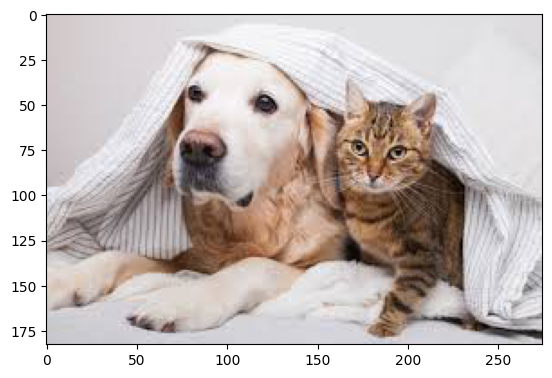

In [48]:
from PIL import Image

input_Img_=Image.open("/content/drive/MyDrive/Data Analysis/catanddog.jpg")

import matplotlib.pyplot as plt
plt.imshow(input_Img_)

Appply the transform as ResNet and AlexNet Models

In [44]:
from torchvision import transforms
transform= transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.48,0.456,0.406],std=[0.229,0.224,0.225])
])

Apply the transform into an Image

In [51]:
transform_inputImg_=transform(input_Img_)

Analyze the shape of tha Image

In [52]:
print(transform_inputImg_.shape)

torch.Size([3, 224, 224])


Applying Data into Batch Format

In [53]:
import torch
imputImg_batch=torch.unsqueeze(transform_inputImg_,0)

ResNet Model

In [54]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

Loading the ResNet 152 Model

In [55]:
resnet = models.resnet152(pretrained=True)


resnet.eval()

output=resnet(imputImg_batch)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:02<00:00, 85.0MB/s]


Read the ImageNet classesText file from google drive

In [ ]:
with open("/content/drive/MyDrive/Data Analysis/imagenet-classes.txt") as classfile:
  ImgeClass=[line.strip() for line in classfile.readlines()]

predict the output index of tha class

In [57]:
_, predicted_Labels=torch.sort(output,descending=True)
print(predicted[0])
percentage=torch.sigmoid(output)[0] * 100 # 29.50
[(ImgeClass[index], percentage[index].item()) for index in predicted_Labels[0][:5]]

tensor(285)


[('golden retriever', 99.97163391113281),
 ('Labrador retriever', 99.96598815917969),
 ('redbone', 99.95099639892578),
 ('bath towel', 99.91573333740234),
 ('plastic bag', 99.83627319335938)]